# **Lab 6: Euler’s Method for Ordinary Differential Equations**<br>

Ordinary Differential Equation (ODE) is a differential equation consisting of one or more functions of a single independent variable and the derivatives of those functions. Finding derivatives analytically is a complex procedure, involving a lot of rules. Computers and calculators find derivatives using some sort of numerical methods. Here, our target is to estimate a function at discrete points given its differential equation using the **Euler's method**. An important thing to note here is that this method can only solve first order ODE of the form $$ \frac{dy}{dx}=f(x,y), y(x_0)=y_0 $$

In today's lab, we will be implementing the **Euler's method** for solving a first order ODE in python. Refer to the example in the lecture slide.

The following is the problem you need to solve.
<br>
A ball at $1200K$ is allowed to cool down in air at an ambient temperature of $300K$. Assuming heat is lost only due to radiation, the differential equation for the temperature of the ball is given by $$\frac{d\theta}{dt}=-2.2067\times 10^{-12} (\theta^4 - 81 \times 10^8), y(0)=1,\theta(0)=1200K$$ where $\theta$ is in $K$ and $t$ in seconds. Find the temperature at $t=480$ seconds using Euler’s method. Assume a step size of $h=240$ seconds. Compare with the exact value.

##Task 1
Implement the bivariate function $f(t, \theta)$ and the algorthim for Euler's method.
$$\theta_{i+1} = \theta_i + f(t_i, \theta_i)(t_{i+1}-t_i)$$ where $h=t_{i+1}-t_i$ is the step size.

In [ ]:
def f(t, theta):
    return -2.2067*1e-12*(theta**4-81*1e8)

def Euler(x_0, y_0, h, x):
    t = x_0
    res=y_0
    time_points=[t]
    res_values=[res]
    while t < x:
        res = res + f(t,res) * h
        t += h
        time_points.append(t)
        res_values.append(res)
    return time_points,res_values,res

In [ ]:
print(f'Temperature at t = 480s with step size h = 240s is {Euler(0,1200,240,480)[2]}K')

Temperature at t = 480s with step size h = 240s is 110.31739981426284K


Your answer should be $\approx 110.32K$.

##Task 2
Calculate the exact solution of the ODE. It is the root of the nonlinear equation
$$ 0.92593\ln\left( \frac{\theta-300}{\theta+300} \right) - 1.8519\tan^{-1}(0.333\times10^{-2}\theta) = -0.22067\times 10^{-3}t - 2.9282 $$ at $t=480$ seconds.

You can use your own root-finding algorithm or you can use the `fsolve()` function from the `scipy` package. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

In [ ]:
import math
import scipy
import numpy as np

def exact_ode(theta, t=480):
    return 0.92593 * np.log((theta - 300) / (theta + 300)) - 1.8519 * np.arctan(0.333*1e-2*theta) + 0.22067 * 1e-3 * t + 2.9282

theta_solution = scipy.optimize.fsolve(exact_ode, 310)
theta_solution

array([646.49586666])

The exact value should be $\theta_{exact} \approx 647.57K$.

Now, approximate the value of $\theta(480)$ using different step sizes, such as $480, 240, 120, 60,$ and $30$. Calculate the Global Truncation Error $E_t$ and the Absolute Relative True Error $|\epsilon_t|\%$ in each case.

In [ ]:
steps=[480,240,120,60,30]
Et=[]
et=[]
approx=[]
for i in range(len(steps)):
    approx.append(Euler(0,1200,steps[i],480)[2])
    Et.append(abs(theta_solution[0]-approx[i]))
    et.append(abs(Et[i]/theta_solution[0])*100)
print(approx)

[-987.8106479999997, 110.31739981426284, 546.7749771189773, 614.9661408677375, 632.7666626119995]


In [ ]:
import pandas as pd
res=[steps,approx,Et,et]
df=pd.DataFrame(np.transpose(res),columns=['Step size,h','theta(480)','Et','|et|%'])
df

,"Step size,h",theta(480),Et,|et|%
0,480.0,-987.810648,1634.306515,252.794581
1,240.0,110.317400,536.178467,82.936101
2,120.0,546.774977,99.720890,15.424830
3,60.0,614.966141,31.529726,4.877019
4,30.0,632.766663,13.729204,2.123634


Your values should approximately match the values of this table.
<br>
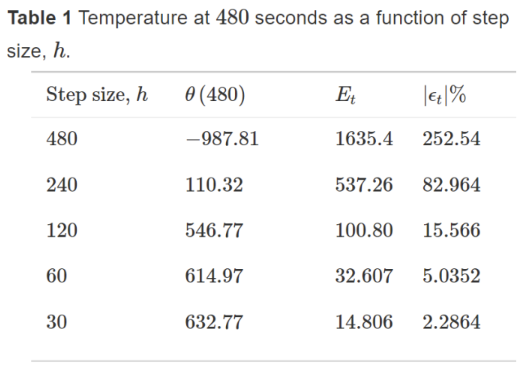

## Task 3
Generate a Temperature $\theta$ vs Step size $h$ plot which portrays the effect of step size in Euler's method. Use a different marker to represent the exact value.

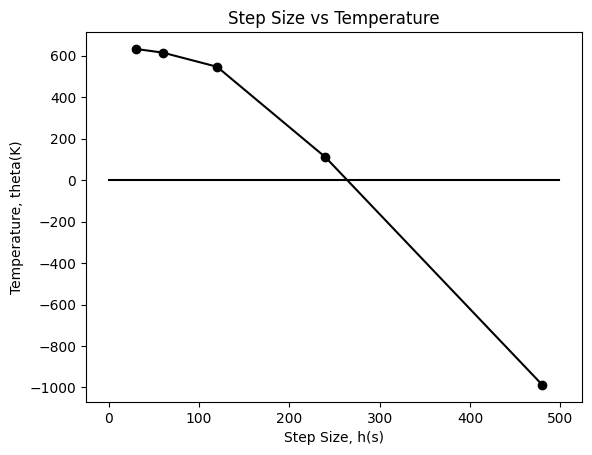

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(df['Step size,h'],df['theta(480)'],'ko',linestyle='-')
ax.plot(np.arange(0,500),np.zeros(len(np.arange(0,500))),'k',linestyle='-')
ax.set_xlabel('Step Size, h(s)')
ax.set_ylabel('Temperature, theta(K)')
ax.set_title('Step Size vs Temperature')
plt.show()

Your graph should look something like,
<br>
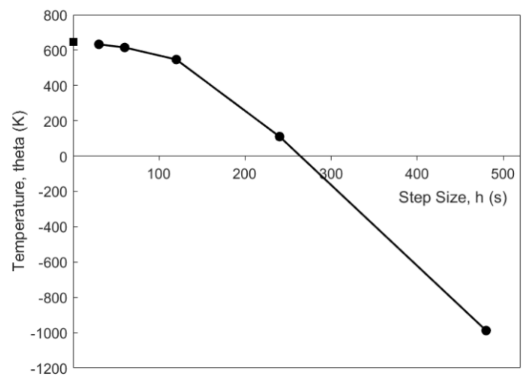

Genrerate a Temperature $\theta$ vs Time $t$ plot that compares the Euler's method approximations for different step sizes with the exact solution.

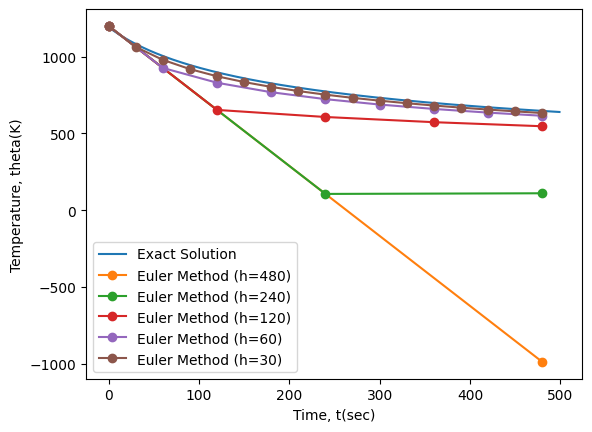

In [ ]:
fig,ax=plt.subplots()
exact=[]
for j in np.arange(0,500):
    exact.append(scipy.optimize.fsolve(exact_ode, 310,args=(j))[0])
ax.plot(np.arange(0,500),exact,label='Exact Solution',linestyle='-')
for h in steps:
    time_points, theta_values,theta = Euler(0,1200,h,480)
    plt.plot(time_points, theta_values, label=f'Euler Method (h={h})', marker='o')

plt.xlabel('Time, t(sec)')
plt.ylabel('Temperature, theta(K)')
plt.legend()
plt.show()

Your graph should look something like,
<br>
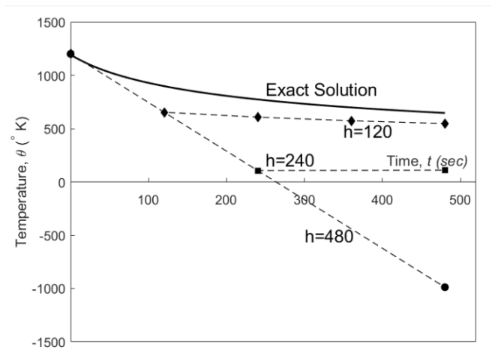